In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

### 실습 1 - 타이타닉

In [2]:
# 데이터 불러오기
ds_titanic = pd.read_csv('/home/piai/바탕화면/실습화일/1 Big Data 분석 기초/titanic.csv')
ds_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# 데이터 속성 확인
print(ds_titanic.info())
print()
print(ds_titanic.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

(891, 12)


In [4]:
# 기술 통계량 확인
ds_titanic.describe().round(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000,891.000,891.000,891.000,891.000,891.000,891.000
mean,446.000,0.384,2.309,29.759,0.523,0.382,32.204
std,257.354,0.487,0.836,13.003,1.103,0.806,49.693
min,1.000,0.000,1.000,0.420,0.000,0.000,0.000
25%,223.500,0.000,2.000,22.000,0.000,0.000,7.910
50%,446.000,0.000,3.000,30.000,0.000,0.000,14.454
75%,668.500,1.000,3.000,35.000,1.000,0.000,31.000
max,891.000,1.000,3.000,80.000,8.000,6.000,512.329


In [5]:
# 결측치 확인
ds_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# 최빈값 찾기 (각 value들의 데이터 개수 다 출력)
ds_titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [7]:
# 결측치 채워넣기
ds_titanic['Cabin'].fillna("기타", inplace=True)
ds_titanic['Embarked'].fillna("S", inplace=True)

In [8]:
# 결측치 채워졌는지 확인
ds_titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<Axes: >

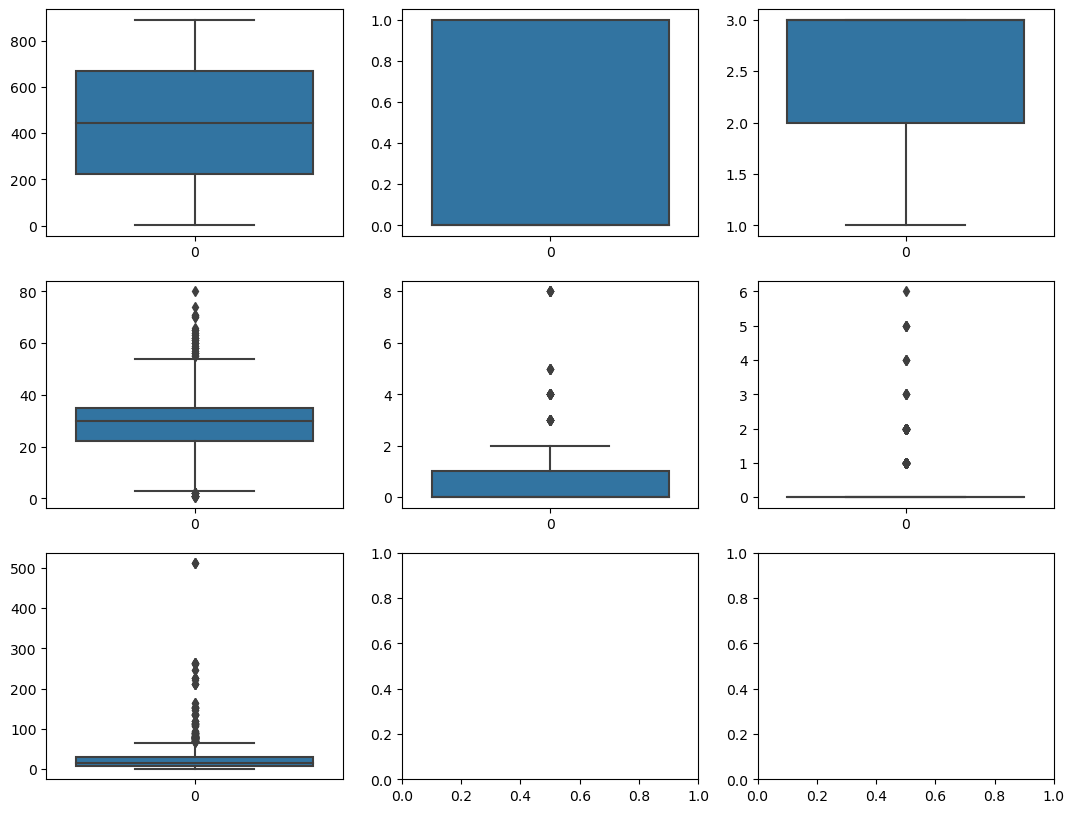

In [9]:
# 이상치 확인하기
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (13,10))

sns.boxplot(data=ds_titanic['PassengerId'], ax=axes[0,0])
sns.boxplot(data=ds_titanic['Survived'], ax=axes[0,1])
sns.boxplot(data=ds_titanic['Pclass'], ax=axes[0,2])
sns.boxplot(data=ds_titanic['Age'], ax=axes[1,0])
sns.boxplot(data=ds_titanic['SibSp'], ax=axes[1,1])
sns.boxplot(data=ds_titanic['Parch'], ax=axes[1,2])
sns.boxplot(data=ds_titanic['Fare'], ax=axes[2,0])

#### 데이터 전처리

In [10]:
# 파생 변수 생성
ds_titanic['RoomNum'] = ds_titanic['Cabin'].str.get(i=0)
ds_titanic['RoomNum']

0      기
1      C
2      기
3      C
4      기
      ..
886    기
887    B
888    기
889    C
890    기
Name: RoomNum, Length: 891, dtype: object

In [11]:
# age 분류 함수
def calcul_age(age):
    if age <= 14:
        return 'Child'
    elif age <= 28:
        return 'Young'
    elif age <= 45:
        return 'Middle'
    elif age <= 56:
        return 'Prime'
    else :
        return 'Old'

In [12]:
# AGEGROUP 열을 만들고 채워넣기
ds_titanic['AGEGROUP'] = ds_titanic['Age'].apply(calcul_age)
ds_titanic['AGEGROUP']

0       Young
1      Middle
2       Young
3      Middle
4      Middle
        ...  
886     Young
887     Young
888    Middle
889     Young
890    Middle
Name: AGEGROUP, Length: 891, dtype: object

In [13]:
# Family 수 세는 함수
def calcul_family(Parch, SibSp):
    family = Parch + SibSp
    return family

In [14]:
# Family 열 만들고 값 넣어주기
ds_titanic["Family"] = calcul_family(ds_titanic['Parch'], ds_titanic['SibSp'])

In [15]:
# Parch, SibSp 열 삭제
ds_titanic = ds_titanic.drop('Parch', axis=1)
ds_titanic = ds_titanic.drop('SibSp', axis=1)

In [18]:
# 요금 구간화 함수 제작
def calcul_FeeBinnig(fee):
    if fee <= 50:
        return '0'
    elif fee <= 100:
        return '1'
    elif fee <= 150:
        return '2'
    elif fee <= 200:
        return '3'
    else :
        return '4'

In [36]:
# FeeBinnig 열 만들고 값 넣어주기
ds_titanic['FeeBinnig'] = ds_titanic['Fare'].apply(calcul_FeeBinnig)
ds_titanic['FeeBinnig']

0      0
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    0
889    0
890    0
Name: FeeBinnig, Length: 891, dtype: object

In [37]:
# 데이터 확인
ds_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,RoomNum,AGEGROUP,Family,FeeBinnig
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,기타,S,기,Young,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,C,Middle,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,기타,S,기,Young,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,C,Middle,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,기타,S,기,Middle,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,211536,13.0000,기타,S,기,Young,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,112053,30.0000,B42,S,B,Young,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,W./C. 6607,23.4500,기타,S,기,Middle,3,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,111369,30.0000,C148,C,C,Young,0,0


#### 그래프 분석

<Axes: >

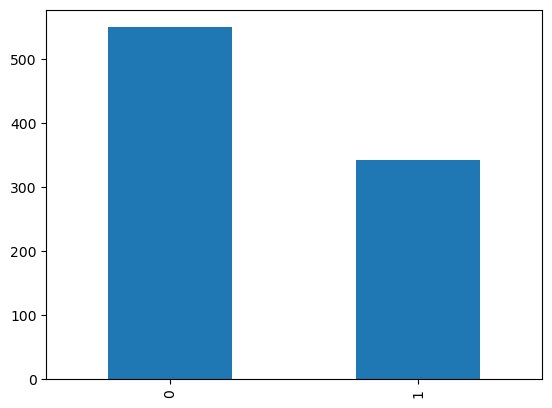

In [22]:
# 막대그래프
df_count = ds_titanic['Survived'].value_counts()
df_count.plot.bar()

<Axes: >

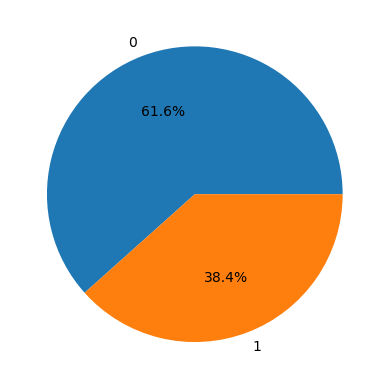

In [23]:
# 파이차트 - Survived 비율 확인
df_count = ds_titanic.groupby(['Survived']).size()
df_count.plot.pie(autopct='%.1f%%')

<Axes: >

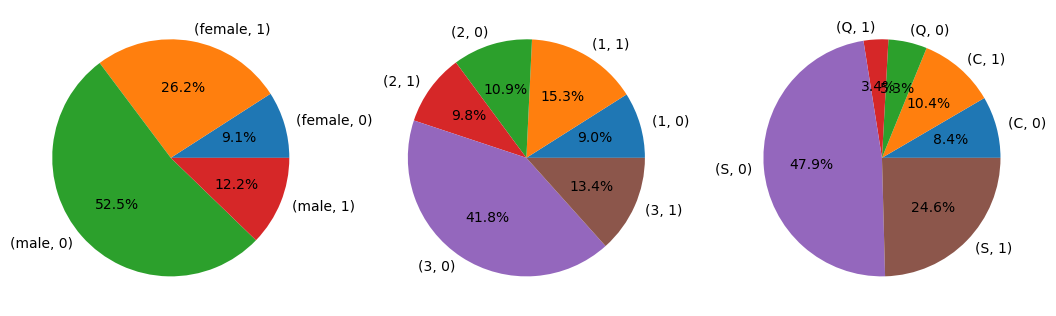

In [38]:
# 파이차트 - 범주형 변수
fig, axes = plt.subplots(1,3, figsize = (13,10))

df_count = ds_titanic.groupby(['Sex','Survived']).size()
df_count.plot.pie(ax=axes[0], autopct='%.1f%%')

df_count = ds_titanic.groupby(['Pclass','Survived']).size()
df_count.plot.pie(ax=axes[1], autopct='%.1f%%')

df_count = ds_titanic.groupby(['Embarked','Survived']).size()
df_count.plot.pie(ax=axes[2], autopct='%.1f%%')

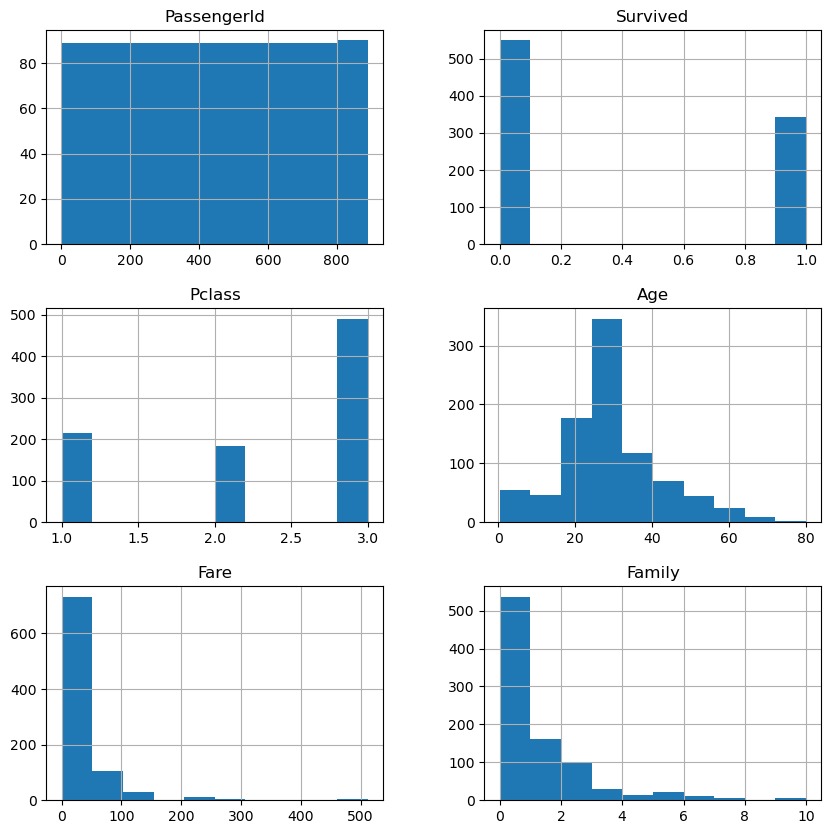

In [25]:
# 연속형 변수에 대한 분포 확인 - 히스토그램
ds_titanic.hist(figsize=(10,10));

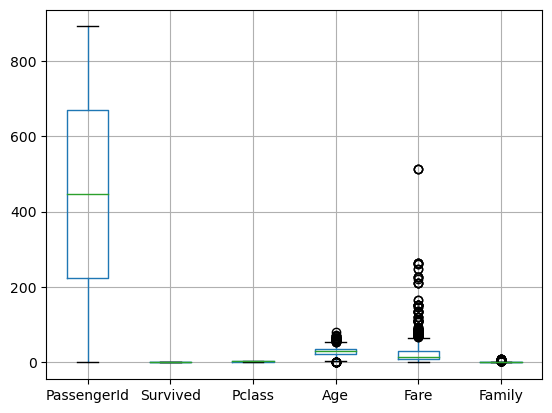

In [39]:
# 연속형 변수에 대한 분포 확인 - Boxplot
ds_titanic.boxplot();

#### 생존에 영향을 미치는 잠재 인자 도출

- 여성의 생존률(74%)이 남성의 생존률(19%)보다 높은 것으로 보아, 여성을 먼저 대피시킨 것으로 생각된다.

- 1등급 객실의 생존률은 63%, 2등급 객실의 생존률은 47%, 3등급 객실의 생존률은 24% 이다. 객실 등급에 따라 탈출 난이도가 달랐던 것으로 생각된다.

- 탑승 구역 S인 사람의 생존률은 34%, 탑승 구역 Q의 생존률은 39% ,탑승 구역 C의 생존률은 55%이다. 탑승한 구역에 따라 생존률에 차이가 있었던 것으로 보이며, S 구역에서 탑승할 경우 탈출하기 더 쉬웠던 것으로 보인다.


### 실습 2 - 자동차 연비 Data Set에서 기술통계치 구하기

In [40]:
# 데이터 불러오기
ds_mycars = pd.read_csv('/home/piai/바탕화면/실습화일/1 Big Data 분석 기초/mycars.csv')
ds_mycars.head()

,manufacturer,model,displacement,year,cylinder,automatic,driving,mpg,highway_mileage,fuel,class
0,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual,f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual,f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto,f,16,26,p,compact


In [41]:
# 시내에서 연비(mpg) 통계치
df = ds_mycars[['driving','mpg']]
df.groupby('driving').describe()

mpg                                                   
         count       mean       std   min   25%   50%   75%   max
driving                                                          
4        103.0  14.330097  2.874459   9.0  13.0  14.0  16.0  21.0
f        106.0  19.971698  3.626510  11.0  18.0  19.0  21.0  35.0
r         25.0  14.080000  2.215852  11.0  12.0  15.0  15.0  18.0

In [29]:
# 고속도로에서 연비(mpg) 통계치
df = ds_mycars[['highway_mileage','mpg']]
df.groupby('highway_mileage').describe()

mpg                                                     
                count       mean       std   min    25%   50%    75%   max
highway_mileage                                                           
12                5.0   9.000000  0.000000   9.0   9.00   9.0   9.00   9.0
14                2.0  11.000000  0.000000  11.0  11.00  11.0  11.00  11.0
15               10.0  11.000000  0.000000  11.0  11.00  11.0  11.00  11.0
16                7.0  11.857143  0.899735  11.0  11.00  12.0  12.50  13.0
17               31.0  13.161290  1.185939  11.0  13.00  13.0  14.00  15.0
18               10.0  12.800000  1.032796  12.0  12.00  12.5  13.00  15.0
19               13.0  14.076923  0.862316  13.0  13.00  14.0  15.00  15.0
20               11.0  15.000000  0.894427  14.0  14.00  15.0  16.00  16.0
21                2.0  15.000000  0.000000  15.0  15.00  15.0  15.00  15.0
22                7.0  15.857143  0.899735  15.0  15.00  16.0  16.50  17.0
23                7.0  16.000000  1.000000  15.0  15.50  16.0  16.00  18.0
24               13.0  16.692308  0.947331  15.0  16.00  17.0  17.00  18.0
25               15.0  17.333333  1.676163  15.0  16.00  17.0  19.00  20.0
26               32.0  18.000000  1.191367  16.0  17.75  18.0  19.00  21.0
27               14.0  19.214286  1.188313  17.0  18.25  19.0  20.00  21.0
28                7.0  19.285714  0.755929  18.0  19.00  19.0  20.00  20.0
29               22.0  20.636364  1.292670  18.0  21.00  21.0  21.00  23.0
30                4.0  22.000000  1.414214  21.0  21.00  21.5  22.50  24.0
31                7.0  21.285714  0.951190  20.0  21.00  21.0  21.50  23.0
32                4.0  24.000000  0.816497  23.0  23.75  24.0  24.25  25.0
33                2.0  26.000000  2.828427  24.0  25.00  26.0  27.00  28.0
34                1.0  26.000000       NaN  26.0  26.00  26.0  26.00  26.0
35                2.0  26.000000  0.000000  26.0  26.00  26.0  26.00  26.0
36                2.0  24.500000  0.707107  24.0  24.25  24.5  24.75  25.0
37                1.0  28.000000       NaN  28.0  28.00  28.0  28.00  28.0
41                1.0  29.000000       NaN  29.0  29.00  29.0  29.00  29.0
44                2.0  34.000000  1.414214  33.0  33.50  34.0  34.50  35.0

### 실습 3 - 구동방식, 모델에 대해 계산

In [42]:
# 데이터 불러오기
ds_mycars = pd.read_csv('/home/piai/바탕화면/실습화일/1 Big Data 분석 기초/mycars.csv')
df = ds_mycars[['driving','model']]

In [43]:
# driving table 만들기
count = df['driving'].value_counts().sort_index()
cumcnt = np.cumsum(count)
percent = count/sum(count)*100
cumpct = np.cumsum(percent)
count_data = pd.DataFrame({'Count':count , 'CumCnt': cumcnt , 'Percent' : percent , 'CumPct' : cumpct})
count_data.columns.name = 'driving'
count_data

driving,Count,CumCnt,Percent,CumPct
4,103,103,44.017094,44.017094
f,106,209,45.299145,89.316239
r,25,234,10.683761,100.000000


In [44]:
# model table 만들기
count2 = df['model'].value_counts().sort_index()
cumcnt2 = np.cumsum(count2)
percent2 = count2/sum(count2)*100
cumpct2 = np.cumsum(percent2)
count_data2 = pd.DataFrame({'Count':count2 , 'CumCnt': cumcnt2 , 'Percent' : percent2 , 'CumPct' : cumpct2})
count_data2.columns.name = 'model'
count_data2

model,Count,CumCnt,Percent,CumPct
4runner 4wd,6,6,2.564103,2.564103
a4,7,13,2.991453,5.555556
a4 quattro,8,21,3.418803,8.974359
a6 quattro,3,24,1.282051,10.256410
altima,6,30,2.564103,12.820513
c1500 suburban 2wd,5,35,2.136752,14.957265
camry,7,42,2.991453,17.948718
camry solara,7,49,2.991453,20.940171
caravan 2wd,11,60,4.700855,25.641026
civic,9,69,3.846154,29.487179


### 실습 4 - 정규분포(키)

In [45]:
# 정규분포
mu = 175
sigma = 5
x = 180
prob = stats.norm.cdf(x,mu,sigma)
print('나의 키가 {0}일 경우에 나는 몇 % 범위에 위치할까요: {1:.1f}%'.format(x,(1-prob)*100))

나의 키가 180일 경우에 나는 몇 % 범위에 위치할까요: 15.9%


### 실습 5 - 정규분포(자동차)

In [46]:
# 1번 문제
mu = 12
sigma = 3
x1 = 9
x2 = 15
prob1 = stats.norm.cdf(x1,mu,sigma)
prob2 = stats.norm.cdf(x2,mu,sigma)
print('1리터를 가지고 {0}km 이상 {1}km 이하를 달릴 확률은 얼마인가요?: {2:.3f}'.format(x1,x2,(prob2-prob1)))

1리터를 가지고 9km 이상 15km 이하를 달릴 확률은 얼마인가요?: 0.683


In [47]:
# 2번 문제
print('1리터를 가지고 {0}km 이상을 달릴 확률은 얼마인가요?: {1:.3f}'.format(x2,(1-prob2)))

1리터를 가지고 15km 이상을 달릴 확률은 얼마인가요?: 0.159
